### Kenny Lam

# MTH9879 Homework 2

Assigned: February 10, 2015.
Due: February 24, 2015 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Yu Gan (yugan323@gmail.com), Fubo Shi (fubo.shi.baruch@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TAs Yu Gan and/or Fubo Shi.


### 0. (0 points) 

Read Chapter 12 of Hasbrouck and Section 6.4 of Foucault, Pagano and R&ouml;ell.


## The Parlour (1998) model

### 1. (10 points) 
Consider the first step $t = 1$ of the 3-step order book case presented in the lecture slides. Suppose that the order book at (or just before) $t = 1$ has one share offered and one share bid ($n_B = n_A = 1$).

Give the probabilities as of a market buy, market sell, limit buy and limit sell at $t = 1$,
You may use my Mathematica notebook *Parlour.nb* as a guide (if you wish).

####<font color = "green">Solution<font color = "black">
We reuse the calculations from the provide Parlour.nb notebook.  The analysis for $t=3$ and $t=2$ are largely unchanged.  Thus the probability of a market buy/sell at $t=3$ is $\frac{5}{22}$ and the probability of a market buy/sell given that the bid/offer queue is empty is also  $\frac{5}{22}$.  The a limit buy/sell placed at at $t=1$ will only get filled if a market sell/buy occurs at both $t=2$ and $t=3$.

In [1]:
from sympy import Rational, Symbol
from sympy.solvers import solve

### Q1 ###

#Parameters
v=Rational(11,2)
a=6
b=5

#Variables
beta = Symbol('beta')

#CDF for uniform dist on (0,2)
pr = lambda(x): 1 if x >= 2 else 0 if x <= 0 else x/2

#Probabilities
pMS = {}
pLS = {}
pMB = {}
pLB = {}

#t=3
pMS[3]=pMB[3]=Rational(5,22)

#t=2
pMB[(1,2,2)]=pMS[(2,1,2)]=Rational(5,22)

#t=1 Sell Orders
#Probability of filling a limit sell
pLSFill=pMB[(1,2,2)]*pMB[3] 

#Benefit functions for sell orders
benLS=lambda(x): (a-x*v)*pLSFill
benMS=lambda(x): (b-x*v)

#Solve for crossing points
x1s=solve(benLS(beta)-benMS(beta),beta)[0]
x2s=solve(benLS(beta),beta)[0]

#Probabilty of sell order at t=1
pMS[1] = pr(x1s)/2
pLS[1] = (pr(x2s)-pr(x1s))/2

#t=1 Buy Orders
#Probability of filling a limit buy
pLBFill=pMS[(2,1,2)]*pMS[3]

#Benefit functions for sell orders
benLB=lambda(x): (x*v-b)*pLBFill
benMB=lambda(x): (x*v-a)

#Solve for crossing points
x1b=solve(benLB(beta),beta)[0]
x2b=solve(benLB(beta)-benMB(beta),beta)[0]

#Probabilty of buy order at t=1
pMB[1] = (1-pr(x2b))/2
pLB[1] = (pr(x2b)-pr(x1b))/2

print 'Probability of limit sell at t=1: {0}'.format(pLS[1])
print 'Probability of market sell at t=1: {0}'.format(pMS[1])
print 'Probability of limit buy at t=1: {0}'.format(pLB[1])
print 'Probability of market buy at t=1: {0}'.format(pMB[1])

Probability of limit sell at t=1: 22/459
Probability of market sell at t=1: 1135/5049
Probability of limit buy at t=1: 22/459
Probability of market buy at t=1: 1135/5049


### 2. (4 points) 
Explain why the optimal market/limit order decision depends in general on quantity available on both sides of the order book in the Parlour model.

####<font color = "green">Solution<font color = "black">
In the Parlour model, any existing quantity at either side of the book acts as a queue.  Since the model only allows at most one limit order to be filled each time step, it is clear that the larger the queue, the less likely that a limit order will be filled.  Furthermore, a reduction in the probabilility of a limit order increases the probability of a market order, which will impact the queue on the other side of the book, which means both sides of the book must be accounted for in any optimal decision.  For example, a market sell will decrease the bid side, which increases the probability of a limit buy.  This in turns reduces the probability of a market buy, which leads to a larger queue on the offer side.  This circles back and leads to an increase in  the probability of a market sell.  We can see that this will typically leads to a directional herding effect for market orders.

### Set up R-environment

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")
source("ziSetup.R")
setwd('E:/Documents/Baruch MFE/MA9879')

## Cont-Kukanov optimal order placement

### 3. (16 points)

Consider the two BATS exchanges BZX and BYX.  Suppose you are trying to buy shares of MSFT in 3.9 minutes ($1\%$ of the trading day).  Suppose further that the two exchanges have the following characteristics:

**Exchange** | **Make fee** | **Take fee** | **Daily volume** 
-----|-----:|-------:| ---- |
| **(per share)** | **(per share)** | **(shares)** 
BZX | -0.32¢ | +0.30¢ | 10,500,000
BYX | +0.03¢ | -0.03¢ | 1,300,000

Assume the daily volatility of MSFT is $1\%$ and that MSFT is trading at $\$37.50$.

(a) We may suppose that if your order is only partially filled, that's because the price moved away (*adverse selection*).  This suggests that we penalize any under fill of limit orders by $\sigma\,\sqrt{T}$ where $T$ is the order duration.  Compute the corresponding value of $\lambda_u$ in cents per share.

####<font color = "green">Solution<font color = "black">

In [4]:
%%R
P <- 37.50
sigma <- 0.01
t <- .01
lambdaU <- sigma * sqrt(t) * P

In [5]:
%Rpull lambdaU
print 'Lambda_u: {0}'.format(lambdaU[0])

Lambda_u: 0.0375


(b) Assuming a spread of $1$ cent, what are $h$, $f$, and $r$ for BZX and BYX respectively (in cents per share)?

####<font color = "green">Solution<font color = "black">

In [6]:
%%R
s <- 0.01
h <- s/2
bzx <- list(r=0.0032,f=0.003,volume=10500000)
byx <- list(r=-0.0003,f=-0.0003,volume=1300000)

In [7]:
%Rpull h bzx byx
bzx=dict(zip(bzx.names, list(bzx)))
byx=dict(zip(byx.names, list(byx)))
print 'h: {0}'.format(h[0])
print 'BZX f: {0}'.format(bzx['f'][0])
print 'BZX r: {0}'.format(bzx['r'][0])
print 'BYX f: {0}'.format(byx['f'][0])
print 'BYX r: {0}'.format(byx['r'][0])

h: 0.005
BZX f: 0.003
BZX r: 0.0032
BYX f: -0.0003
BYX r: -0.0003


(c) Assuming no seasonality, what is the mean value $\bar \xi$ of $\xi$ (over 3.9 minutes) for BZX and BYX respectively (in shares)?

####<font color = "green">Solution<font color = "black">

In [8]:
%%R
#We assume few or no cancellations (since we have no information regarding them)
bzx$xi <- bzx$volume * t
byx$xi <- byx$volume * t

In [9]:
%Rpull bzx byx
bzx=dict(zip(bzx.names, list(bzx)))
byx=dict(zip(byx.names, list(byx)))
print 'BZX xi mean: {0}'.format(bzx['xi'][0])
print 'BYX xi mean: {0}'.format(byx['xi'][0])

BZX xi mean: 105000.0
BYX xi mean: 13000.0


(d)  Assume that $\xi$ is log normally distributed with

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}.
$$

where $Z \sim N(0,1)$ and $\sigma = 1/2$.  What is the standard deviation of $\xi$ (in terms of $\bar \xi$)?

####<font color = "green">Solution<font color = "black">
$$
\begin{align*}
var(\xi) &= \bar{\xi}^2\left(e^{\sigma^2}-1\right)e^{-\frac{1}{2}2\sigma^2+\sigma^2} \\
&= \bar{\xi}^2\left(e^{\sigma^2}-1\right) \\
&= \bar{\xi}^2\left(e^{\frac{1}{4}}-1\right) \\
\sigma_{\xi}&=\bar{\xi}\sqrt{e^{1/4}-1} \\
\end{align*}
$$

(e) Write R-code to determine the optimal order size $L^\star+Q$ on BZX and BYX respectively. Assume here that you will either trade on BZX or BYX; there is no splitting of the order between the two exchanges. <br>
(Hint: You may find the R function *qnorm(. )* useful).

####<font color = "green">Solution<font color = "black">

In [10]:
%%R
ckOptimal <- function(h,r,f,xi,sigma,lambdaU) {
  fql <- (2*h+f+r)/(lambdaU+h+r)
  return(qlnorm(fql,meanlog=-1/2*sigma*sigma+log(xi),sdlog=sigma))
}

bzx$L <- ckOptimal(h,bzx$r,bzx$f,bzx$xi,1/2,lambdaU)
byx$L <- ckOptimal(h,byx$r,byx$f,byx$xi,1/2,lambdaU)

In [11]:
%Rpull bzx byx
bzx=dict(zip(bzx.names, list(bzx)))
byx=dict(zip(byx.names, list(byx)))
print 'BZX L+Q: {0}'.format(bzx['L'][0])
print 'BYX L+Q: {0}'.format(byx['L'][0])

BZX L+Q: 76887.3612204
BYX L+Q: 7834.03778695


(f) Compare the optimal limit order sizes from part (e) with the ratios of quote sizes and volumes on BZX and BYX.  Are your results from part (e) roughly consistent with observation.  You may assume that the quote sizes shown on the MSFT BATS slides from Lecture 1 are typical.

####<font color = "green">Solution<font color = "black">

In [12]:
%%R
ckRatioBzx <- bzx$L / bzx$volume
avgBzxQuoteSize <- mean(c(7300,8300,6200,4167,2301,9200,4700,4100,4000,4600))
bzxVolume <- 2175982
ratioBzx <- avgBzxQuoteSize/bzxVolume

ckRatioByx <- byx$L / byx$volume
avgByxQuoteSize <- mean(c(1300,1100,1400,1100,547,700,1300,1300,1100,1200))
byxVolume <- 303791
ratioByx <- avgByxQuoteSize/byxVolume

In [13]:
%Rpull ckRatioBzx ckRatioByx ratioBzx ratioByx
print 'BZX CK L+Q to Volume ratio: {0}'.format(ckRatioBzx[0])
print 'BZX Avg Quote size to Volume ratio: {0}'.format(ratioBzx[0])
print 'BYX CK L+Q to Volume ratio: {0}'.format(ckRatioByx[0])
print 'BYX Avg Quote size to Volume ratio: {0}'.format(ratioByx[0])

BZX CK L+Q to Volume ratio: 0.00732260583051
BZX Avg Quote size to Volume ratio: 0.00252152821117
BYX CK L+Q to Volume ratio: 0.00602618291304
BYX Avg Quote size to Volume ratio: 0.00363638159129


We can see that they are roughly similar and on the same order of magnitude.

## The Bouchaud-M&eacute;zard-Potters order book approximation

### 4. (16 points)

When $\lambda(u)=\alpha$,  a constant, the BMP order density becomes

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\} \\
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

where the characteristic distance

$$
\tilde \Delta=\sqrt{\frac{\sigma^2}{2\,\delta}}.
$$

(a) Amend the SFGK zero intelligence code from Problem 3 of HW1 to count the number of limit orders generated in addition to computing the average book shape.

####<font color = "green">Solution<font color = "black">

In [14]:
%%R
numLimBuy <<- 0
numLimSell <<- 0

#Modified buy limit order
limitBuyOrder <- function(price=NA){
  if (is.na(price))
  {prx <<- (bestOffer()-pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,]<<- c("LB",prx)} 
  numLimBuy <<- numLimBuy+1
  book$buySize[book$Price==prx]<<-book$buySize[book$Price==prx]+1} 

#Modified sell limit order
limitSellOrder <- function(price=NA){
  if (is.na(price))
  {prx <<- (bestBid()+pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,] <<- c("LS",prx)}
  numLimSell <<- numLimSell+1
  book$sellSize[book$Price==prx]<<-book$sellSize[book$Price==prx]+1} 
    
resetLimitOrderCount <- function() {
  numLimBuy <<- 0
  numLimSell <<- 0
}

(b) With $\alpha = 1$, $\mu = 10$ and $\delta = \frac15$, simulate 100,000 events and plot the resulting average book shape in red (in a band $\pm 20$ around the mid price).

####<font color = "green">Solution<font color = "black">

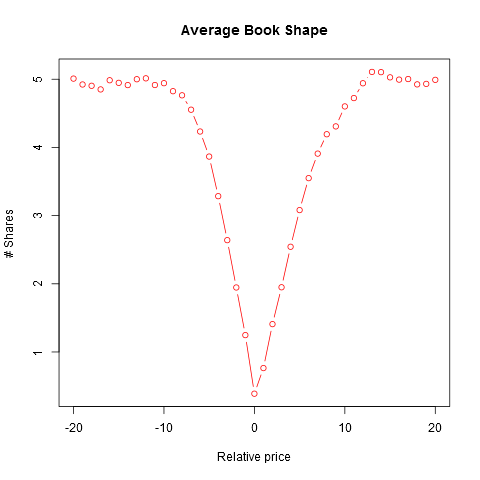

In [15]:
%%R
logging <- F

#Parameters
alpha <- 1
mu <- 10
delta <- 1/5 
initializeBook5()

# Burn in for 1000 events
for(count in 1:100){
  generateEvent()
}

resetLimitOrderCount()

numEvents <- 100000 # Average over 100,000 events
avgBookShape <- bookShape(20)/numEvents
for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
}

plot(-20:20,avgBookShape,main='Average Book Shape',xlab="Relative price",ylab="# Shares", col="red", type="b")

(c) From your simulation, what is the probability $P_L$ of a limit order at a given level conditional on an event? (Recall that there are 60 limit order levels in the simulation).

####<font color = "green">Solution<font color = "black">

In [16]:
%%R
numLimOrders <- numLimBuy + numLimSell
PL <- numLimOrders / numEvents / (L * 2)

In [17]:
%Rpull PL
print 'PL: {0}'.format(PL[0])

PL: 0.008331


(d) In [Gatheral and Oomen]<sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>1<span>]</span></a></sup>, with these SFGK parameters, realized variance per event was estimated as

$$
\sigma^2_{GO} = 0.083.
$$

Using your estimate $P_L$ of limit orders per level per event, convert this estimate to variance per limit order (recall that $\alpha=1$).  Denote your result by $\sigma^2_{GO}$.  Compute the characteristic distance $\tilde \Delta_{GO}$ with this estimate $\sigma^2_{GO}$.

####<font color = "green">Solution<font color = "black">

In [18]:
%%R
varGO <- 0.083
#Probability that a limit orders arrives at best bid/ask
bPL <- PL * 2 
#We assume that only limit orders at the best bid or ask have an impact on the price variance so we scale by those events
varGO <- varGO/(bPL)
cDistGO <- sqrt(varGO/(2*delta))

In [19]:
%Rpull varGO cDistGO
print 'sigma^2 GO: {0}'.format(varGO[0])
print 'Delta_GO: {0}'.format(cDistGO[0])

sigma^2 GO: 4.98139479054
Delta_GO: 3.52894984044


(e) In Lecture 1, using dimensional analysis, we estimated that variance $\sigma^2_{DA}$ per unit time should be of the order of

$$
\sigma^2_{DA} = \frac{\mu\,\delta}{\alpha^2}.
$$

Compute the characteristic distance $\tilde \Delta_{DA}$ with this estimate $\sigma^2_{DA}$.

####<font color = "green">Solution<font color = "black">

In [20]:
%%R
varDA <- (mu*delta) / (alpha*alpha)
cDistDA <- sqrt(varDA/(2*delta))

In [21]:
%Rpull varDA cDistDA
print 'sigma^2 DA: {0}'.format(varDA[0])
print 'Delta_DA: {0}'.format(cDistDA[0])

sigma^2 DA: 2.0
Delta_DA: 2.2360679775


(f)  Using your two estimates of $\tilde \Delta$ from parts (d) and (e),  write functions to compute the corresponding order book densities $\rho_{GO}(\Delta)$ and $\rho_{DA}(\Delta)$.

####<font color = "green">Solution<font color = "black">

In [22]:
%%R
rhoBMP <- function(d,cDist) { alpha/delta*(1-exp(-abs(d)/cDist)) }

(g)
Superimpose plots of the asymptotic densities $\rho_{DA}(\Delta)$ (in blue) and $\rho_{DA}(\Delta)$ (in orange) on your plot of the average book shape.

####<font color = "green">Solution<font color = "black">

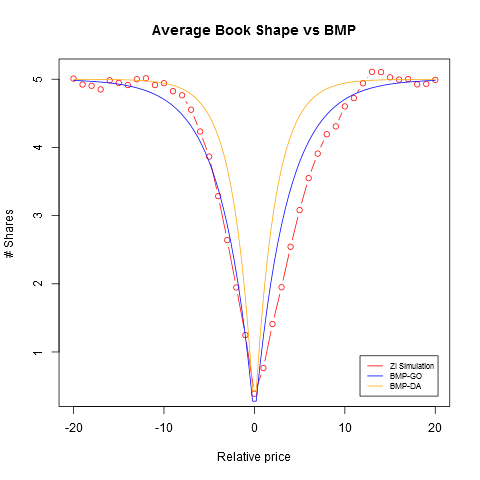

In [23]:
%%R
plot(-20:20,avgBookShape,main='Average Book Shape vs BMP',xlab="Relative price",ylab="# Shares", col="red", type="b")
curve(rhoBMP(x,cDistGO),from=-20,to=20,n=100,col="blue",add=T)
curve(rhoBMP(x,cDistDA),from=-20,to=20,n=100,col="orange",add=T)
legend('bottomright', inset=0.03, legend=c('ZI Simulation', 'BMP-GO','BMP-DA'), lty=c(1, 1,1), col=c('red', 'blue','orange'), cex=0.7)

### 5. (6 points)

Another of Mike and Farmer's observations is that the distribution of marketable as well as unmarketable limit orders as a function of distance $\Delta$ to the same-side best quote is well-described by a Student-$t$ distribution.  Assume $\mu=1/2$ as above.

(a) Derive an expression in terms of the Student-$t$ cumulative density function for the ratio of arrival rates of limit to market orders as a function of the spread $s$.  How does this ratio vary with $s$?

####<font color = "green">Solution<font color = "black">
Let $F(\Delta)$ be the CDF of a Student-$t$ distribution with $1/2$ degrees of freedom.  Wlog, we consider buy orders only. Conditional on an order being placed, the probability of the order being inside the book or inside the spread is $F(s)$.  The probabilty of the order being marketable is $1-F(s)=F(-s)$.  Thus the ratio of limit orders to market orders $R_{L/M}$ is
$$
R_{L/M}=\frac{F(s)}{F(-s)}
$$
This is clearly increasing with $s$, suggesting that as the spread widens, a greater proportion of orders will be limit orders as opposed to market orders.

(b) Relative to the zero-intelligence model, does this empirically observed strategic behavior make the spread revert faster or more slowly?

####<font color = "green">Solution<font color = "black">
Based on the above, we can see that the proportion of market orders varies inversely with respect to the spread.  When spreads tighten, we expect an increased rate of market order arrivals, which will serve to widen spreads.  When spreads widen, we expect and increased rate of limt orders, which will likely tighten spreads.  Thus we have an active spread reversion dynamic.  We expect this to cause faster spread reversion than in the ZI model whose rates of market and limit orders are driven by independent processes with constant dynamics.

### References

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel C. A Oomen, Zero-intelligence realized variance estimation, <span>*Finance and Stochastics*,</span> <span>**14**</span>(2) 249–283, 2010.</li>

</ol>